# Prim's Algorithm

Prim's Algorithm is a greedy algorithm that is used to find the minimum spanning tree for a undirected, weighted graph. 

Before getting started with this notebook, please ensure you have completed the notebook on [Kruskal's Algorithm](./3_kruskal.ipynb) where we introduced the idea of a minimum spanning tree.

## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Prim's algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph import *
from modules.visualize_graph import *

<a class="anchor" id="graph1"></a>
## Building the graph

To establish the implementation of the Prim's algorithm, we create a weighted, undirected graph which is the same graph used in the previous notebooks.

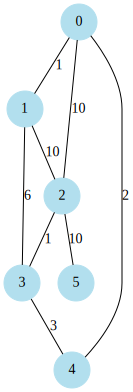

In [2]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.createGraph([a, b, c, d, e, f], directed=False)


graphs.add_Edge(a,b,1)
graphs.add_Edge(a,c,10)
graphs.add_Edge(a,e,2)
graphs.add_Edge(b,c,10)
graphs.add_Edge(b,d,6)
graphs.add_Edge(c,d,1)
graphs.add_Edge(c,f,10)
graphs.add_Edge(d,e,3)

visualizeGraph(graphs, "prims")

<a class="anchor" id="algorithm"></a>
## Prim's Algorithm
Prim's algorithm resembles a lot like the Dijkstra's algorithm as both rely on the greedy criterion of finding the "next closest" node. Prim's algorithm builds a minimum spanning start by starting from one of the nodes on the graph and adds new edges that links to the nodes in the minimum spanning tree to the nodes outside the tree. The algorithm adds a new node to the minimum spanning tree based on the **cut property** which essentially finds the closest node to the tree. This means, we will need two lists where one contains the list of nodes in the tree and the other contains the nodes outside the tree.


#### Note on the Cut Property of a graph
The cut property works with two lists of nodes on the graph where one list contains the nodes part of the minimum spanning tree and the other list contains the nodes that are outside the tree. We use the cut property of the graph to find the next node that could be added to the minimum spanning tree which is selected as the shortest edge that exists between the list of nodes on the minimum spanning tree and the list of nodes outside the tree.


### About the algorithm
Now, let us discuss how Prim's algorithm works for a undirected, weighted graph.

We initially a list/ array to store the distance for all nodes on the graph and set their values as $\inf$.
The node that we use as the source or starting node has a distance weight as $0$ and is added to the list of nodes on the minimum spanning tree.

Next, we look at the nodes adjacent to the source node and update their respective distances. The adjacent node with the smallest edge from the source node is selected, and added to the list of nodes on the minimum spanning tree. This process is repeated for the recently addded node to the minimum spanning tree, to find if its adjacent nodes cab reach the minimum spanning tree more quickly through the current node or another node exists in the tree. This process is similar to the step of updating the previous node in Dijkstra's algorithm.


### Pseudo Code
* `key[]` -  maintains the distance 
* `previous[]` - maintains the nodes added to the minimum spanning tree.
<pre> 
1  <b>function</b> Prim(<i>G</i>):
2
3      <b>for each</b> node <i>v</i> in <i>Graph</i>:             
4          key[<i>v</i>] ← INFINITY                  
5          previous[<i>v</i>] ← UNDEFINED                 
6            
7      key[<i>0</i>] ← 0                        
8      Q = G.V
9
10      <b>while</b> <i>Q</i> is not empty:
11          <i>min_node</i> ← node in <i>Q</i> with min key[min_node] 
12                                              
13          <b>for each</b> neighbor <i>v</i> of <i>min_node</i> in <i>Q</i>: 
14              <b>if</b> <i>v</i> in <i>Q</i> <b>and</b> <i>length(<i>min_node</i>, <i>v</i>)</i> &lt; key[<i>v</i>]:               
15                  key[<i>v</i>] ← <i>length(<i>min_node</i>, <i>v</i>)</i> 
16                  previous[<i>v</i>] ← <i>min_node</i> 
17
18      <b>return</b> previous[]
</pre>





<a class="anchor" id="implementation"></a>
## Implementing Prim's algorithm

In [3]:
def minKey(key, mstNodeSet):
    minValue = sys.maxsize
    for index in range(len(key)): #same length as nodes in graph
        if key[index] < minValue and mstNodeSet[index] == False :
            minValue = key[index]
            minNodeIndex = index
    return minNodeIndex

def prims(graph, adjMatrix):
    edges = graph.get_allEdges()
    
    #key values to pick minimum weight in cut 
    key = [sys.maxsize] * len(graph.get_allNodes()) 
    key[0] = 0 #Make key 0 so that it is picked as first node
    
    mstNodeSet = [False] * len(graph.get_allNodes())
    mst = [None] * len(graph.get_allNodes()) #stores MST
    mst[0] = -1 
    
    for i in range(len(graph.get_allNodes())):
        minNodeIndex = minKey(key, mstNodeSet)
        
        mstNodeSet[minNodeIndex] = True
        
        for (u, v, w) in edges:
            if u == minNodeIndex and w > 0 and mstNodeSet[v] == False and key[v] > w:
                    key[v] = w
                    mst[v] = u
            if v == minNodeIndex and w > 0 and mstNodeSet[u] == False and key[u] > w:
                    key[u] = w
                    mst[u] = v           

    mstEdges = []
    for i in range(1, len(mst)): 
        mstEdges.append([mst[i], i, adjMatrix[i][ mst[i] ]])
    return mstEdges

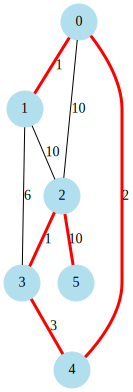

In [4]:
mstEdges = prims(graphs, graphs.get_adjMatrix())
displayPath(mstEdges, "prims")

<a class="anchor" id="proof"></a>
## Proof of correctness



Let $G$ be a connected, weighted graph. On every iteration the algorithm adds an edge that connects a node on the sub-graph $G^{*}$ of $G$ to a node that is not yet in $G^{*}$ . Since $G$ is a connected graph there will always exists a path to all nodes. The algorithm produces a tree as a sub-graph since there exists an edge connecting the nodes in the sub-graph. Thus, $G^{*}$ is a tree and we would now prove that this is also the minimum spanning tree of graph $G$.

Let $T$ be a minimum spanning tree of graph $G$. When $T = G^{*}$, then $G^{*}$ is a minimum spanning tree. When $T != G^{*}$, consider an edge $e_{1}$ which is added while constructing the tree $G^{*}$ and $e_{1}$ is not part of the tree $T$. Let $N$ be the list of nodes that are present in the tree before adding the edge $e_{1}$. 

This means, one endpoint of the edge $e_{1}$ belongs to the node list $N$ and the other endpoint is not present in the node list. Since, $T$ is a spanning tree of $G$, there would exist an edge that connects the two enpoints in edge $e_{1}$. In each iteration of the algorithm, the algorithm encounters an edge $e_{i}$ which connects a nodes in the node list $N$ to another node which is not in $N$. During the iteration when the algorithm adds the edge $e_{1}$ to $G^{*}$, it could've been possible to add edge $e_{i}$, when the  $e_{i}$ has a lower weight than  $e_{1}$. Since,  $e_{i}$  is not added to $G^{*}$, we conclude that,

$$\text{weight of edge }  e_{i} \geq \text{weight of edge }  e_{1}  $$ 

Let $G^{*}_{1}$ be the graph that is obtained by removing the edge $e_{i}$ and adding the edge $e_{1}$ to the tree $G^{*}$. Since,$G^{*}_{1}$ has the same number of edges as $G^{*}$ and $G^{*}$ is a connected graph, we conclude that $G^{*}_{1}$ is connected. Since, the sum of the edge weights of $G^{*}_{1}$ is not larger than $G^{*}$, $G^{*}_{1}$ is also a minimum spanning tree of $G$ as it contains the edge $e_{1}$ and the list of edges that connect the nodes in $N$. By repeating the steps of adding edges to $G^{*}_{1}$, we eventually get the minimum spanning tree of $G$, which means $G^{*}_{1} \text{ is identical to } G^{*}$. This means that $G^{*}$ is a minimum spanning tree.

<a class="anchor" id="references"></a>
## Reference

- [1] Leiserson, Charles Eric, Ronald L. Rivest, Thomas H. Cormen, and Clifford Stein. Introduction to algorithms. Chapter 23. Vol. 6. Cambridge, MA: MIT press, 2001.
- [2] Prim's algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Prim%27s_algorithm)
- [3] Implementation of the Prim's Algorithm from [Geeks for Geeks](https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/)
- [4] Alex Allain's post on Prim's Algorithm on [cprogramming.com](https://www.cprogramming.com/tutorial/computersciencetheory/mst.html)
- [5] Minimum Spanning Trees Lecture Slides from [Princeton](https://algs4.cs.princeton.edu/lectures/43MinimumSpanningTrees-2x2.pdf)